### Project :
## Human Activity Recognition : Predictions using ML Models

In [2]:
# Importing necessary libraries

import numpy as np
import pandas as pd

In [3]:
# Reading data from CSV file

train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [4]:
# Checking the shape of train and test

print(train.shape)
print(test.shape)

(7352, 564)
(2947, 564)


In [5]:
# Displaying first 5 rows of training data

train.head(5)

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,Subject,Activity,Activity_Name
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,Standing
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,Standing
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,Standing
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,Standing
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,Standing


In [6]:
# Displaying first 5 rows of testing data

test.head(5)

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,Subject,Activity,Activity_Name
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,Standing
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,Standing
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,Standing
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,Standing
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,Standing


In [7]:
# Getting X_train and y_train from train data

X_train = train.drop(['Subject', 'Activity', 'Activity_Name'], axis=1)
y_train = train.Activity

In [8]:
# Getting X_test and y_test from test data

X_test = test.drop(['Subject', 'Activity', 'Activity_Name'], axis=1)
y_test = test.Activity

In [9]:
# Displaying the shape of training and testing data

print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((7352, 561),(7352,))
X_test  and y_test  : ((2947, 561),(2947,))


In [10]:
# Let's use Linear discriminant analysis to find features that classifies the label well

# Importing libraries

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [11]:
lda = LDA()
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [12]:
# Displaying the shape of training and testing data

print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((7352, 5),(7352,))
X_test  and y_test  : ((2947, 5),(2947,))


## Let's define some generic functions to create ML models

### Function to plot Confusion Matrix

In [13]:
# Importing necessary libraries

import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [14]:
# Creating a function to print text in Bold and in given color

from IPython.display import Markdown, display

def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))

In [15]:
# Function to plot Confusion Matrix

def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap = plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

In [16]:
from datetime import datetime
from sklearn.metrics import ConfusionMatrixDisplay

def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, print_cm=True, cm_cmap=plt.cm.Greens):
    results = dict()

    # Training time
    train_start_time = datetime.now()
    model.fit(X_train, y_train)
    train_end_time = datetime.now()
    results['training_time'] = train_end_time - train_start_time
    print(f'Training time (HH:MM:SS.ms) - {results["training_time"]}')

    # Testing time
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    results['testing_time'] = test_end_time - test_start_time
    print(f'Testing time (HH:MM:SS.ms) - {results["testing_time"]}')
    results['predicted'] = y_pred

    # Model accuracy
    accuracy = metrics.accuracy_score(y_test, y_pred)
    results['accuracy'] = accuracy
    print(f'**Accuracy:** {accuracy}')

    # Confusion Matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    print('**Confusion Matrix:**')
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels).plot(cmap=plt.cm.YlGn)
    plt.show()

    # Normalized Confusion Matrix
    if cm_normalize:
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('**Normalized Confusion Matrix:**')
        ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=class_labels).plot(cmap=cm_cmap)
        plt.show()

    # Classification report
    classification_report = metrics.classification_report(y_test, y_pred, target_names=class_labels)
    results['classification_report'] = classification_report
    print('**Classification Report**')
    print(classification_report)

    # Store model in results
    results['model'] = model

    return results


In [17]:
def print_grid_search_attributes(model):

    # Let's print the best estimator that gave highest score

    printmd('**Best Estimator:**', color='blue')
    print('{}\n'.format(model.best_estimator_))


    # Let's print the best parameters that gave best results

    printmd('**Best parameters:**', color='blue')
    print('{}\n'.format(model.best_params_))


    #  Let's print the number of cross validation splits

    printmd('**Number of CrossValidation sets:**', color='blue')
    print('{}\n'.format(model.n_splits_))


    # Let's print the Best score of the best estimator

    printmd('**Best Score:**', color='blue')
    print('{}\n'.format(model.best_score_))

## Applying various Machine learning model with Grid-Search

### 1. Logistic Regression

In [18]:
# Importing necessary libraries

from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

In [19]:
# Creating a list labels to be added to plots

labels=['Laying', 'Sitting','Standing','Walking','Walking_Downstairs','Walking_Upstairs']

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/us

Training time (HH:MM:SS.ms) - 0:00:03.800017
Testing time (HH:MM:SS.ms) - 0:00:00.001621
**Accuracy:** 0.9633525619273838
**Confusion Matrix:**


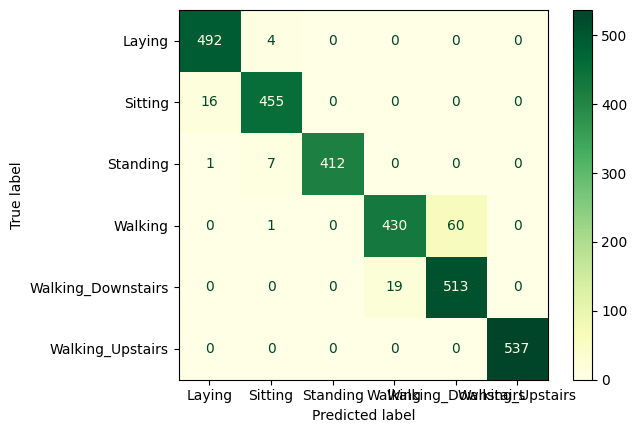

**Normalized Confusion Matrix:**


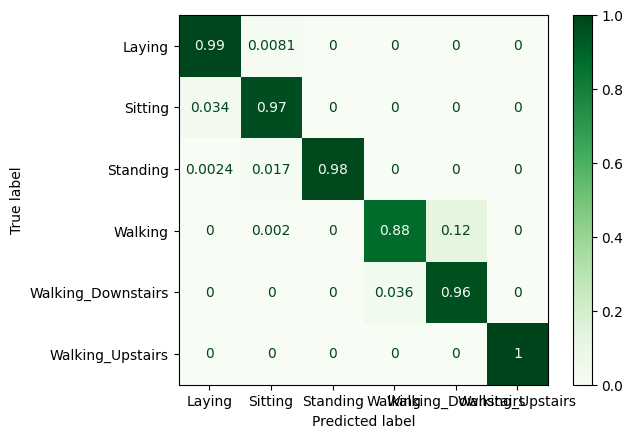

**Classification Report**
                    precision    recall  f1-score   support

            Laying       0.97      0.99      0.98       496
           Sitting       0.97      0.97      0.97       471
          Standing       1.00      0.98      0.99       420
           Walking       0.96      0.88      0.91       491
Walking_Downstairs       0.90      0.96      0.93       532
  Walking_Upstairs       1.00      1.00      1.00       537

          accuracy                           0.96      2947
         macro avg       0.97      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



<span style='color:blue'>**Best Estimator:**</span>

LogisticRegression(C=20)



<span style='color:blue'>**Best parameters:**</span>

{'C': 20, 'penalty': 'l2'}



<span style='color:blue'>**Number of CrossValidation sets:**</span>

5



<span style='color:blue'>**Best Score:**</span>

0.9838137784005513



In [20]:
# Let's define the parameters to be tuned

parameters = {'C':[20, 25, 30, 35, 40], 'penalty':['l1', 'l2']}

# Let's initiate the model

log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# Printing the best attributes of the model

print_grid_search_attributes(log_reg_grid_results['model'])

### 2. Support Vector Classifier

In [21]:
# Importing Necessary libraries

from sklearn.svm import LinearSVC

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Training time (HH:MM:SS.ms) - 0:00:00.584326
Testing time (HH:MM:SS.ms) - 0:00:00.000973
**Accuracy:** 0.9619952494061758
**Confusion Matrix:**


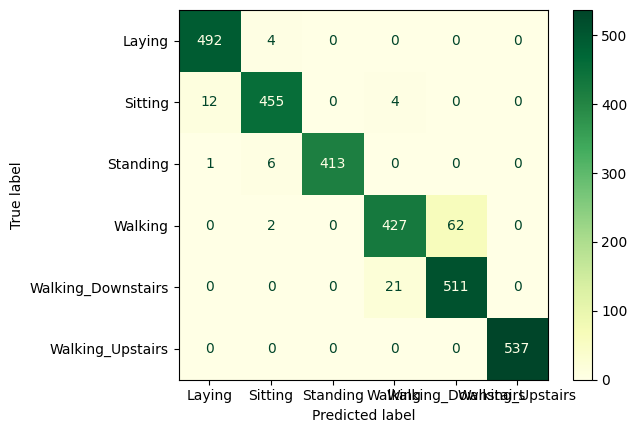

**Normalized Confusion Matrix:**


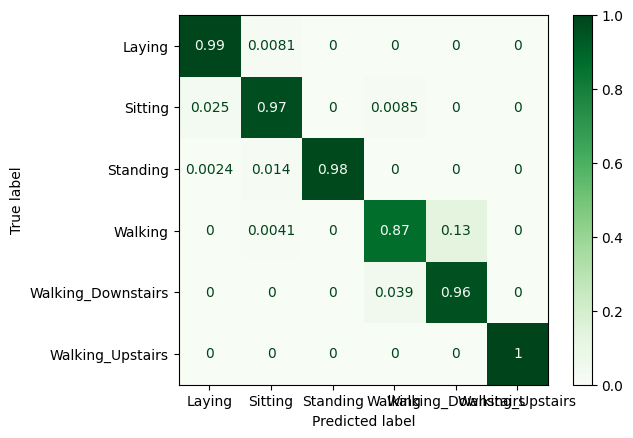

**Classification Report**
                    precision    recall  f1-score   support

            Laying       0.97      0.99      0.98       496
           Sitting       0.97      0.97      0.97       471
          Standing       1.00      0.98      0.99       420
           Walking       0.94      0.87      0.91       491
Walking_Downstairs       0.89      0.96      0.92       532
  Walking_Upstairs       1.00      1.00      1.00       537

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



<span style='color:blue'>**Best Estimator:**</span>

LinearSVC(C=4)



<span style='color:blue'>**Best parameters:**</span>

{'C': 4}



<span style='color:blue'>**Number of CrossValidation sets:**</span>

5



<span style='color:blue'>**Best Score:**</span>

0.9843581810698447



In [22]:
# Let's define the parameters to be tuned

parameters = {'C':[0.25, 0.5, 1, 2, 4, 8]}

# Let's initiate the model

lin_svc = LinearSVC()
lin_svc_grid = GridSearchCV(lin_svc, param_grid=parameters, verbose=1, n_jobs=-1)
lin_svc_grid_results = perform_model(lin_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# Printing the best attributes of the model

print_grid_search_attributes(lin_svc_grid_results['model'])

### 3. Kernel SVM

In [23]:
# Importing Libraries

from sklearn.svm import SVC

Training time (HH:MM:SS.ms) - 0:01:41.459967
Testing time (HH:MM:SS.ms) - 0:00:00.115231
**Accuracy:** 0.9684424838819138
**Confusion Matrix:**


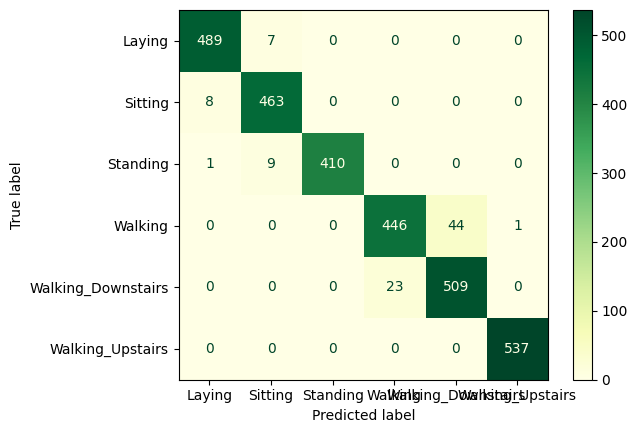

**Normalized Confusion Matrix:**


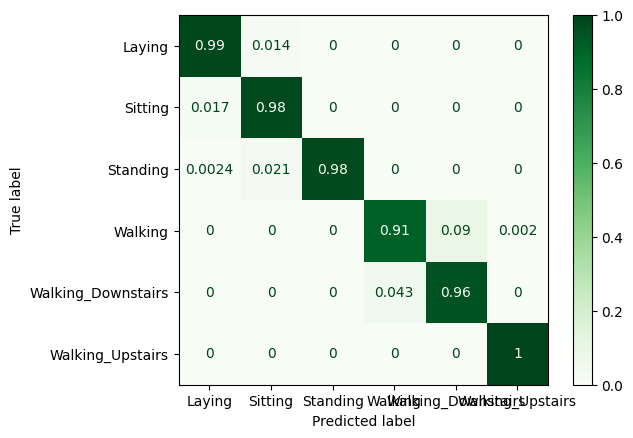

**Classification Report**
                    precision    recall  f1-score   support

            Laying       0.98      0.99      0.98       496
           Sitting       0.97      0.98      0.97       471
          Standing       1.00      0.98      0.99       420
           Walking       0.95      0.91      0.93       491
Walking_Downstairs       0.92      0.96      0.94       532
  Walking_Upstairs       1.00      1.00      1.00       537

          accuracy                           0.97      2947
         macro avg       0.97      0.97      0.97      2947
      weighted avg       0.97      0.97      0.97      2947



<span style='color:blue'>**Best Estimator:**</span>

SVC(C=0.125, gamma=0.1)



<span style='color:blue'>**Best parameters:**</span>

{'C': 0.125, 'gamma': 0.1}



<span style='color:blue'>**Number of CrossValidation sets:**</span>

5



<span style='color:blue'>**Best Score:**</span>

0.9861267035706194



In [24]:
# Let's define the parameters to be tuned

parameters = {'C':[0.125, 0.25, 0.5, 1], 'gamma':[0.01, 0.1, 1, 2]}

# Let's initiate the model

rbf_svc = SVC(kernel='rbf')
rbf_svc_grid = GridSearchCV(rbf_svc, param_grid=parameters)
rbf_svc_grid_results = perform_model(rbf_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# Printing the best attributes of the model

print_grid_search_attributes(rbf_svc_grid_results['model'])

### 4. Decision Tree

In [27]:
# Importing libraries

from sklearn.tree import DecisionTreeClassifier

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Training time (HH:MM:SS.ms) - 0:00:00.661052
Testing time (HH:MM:SS.ms) - 0:00:00.000594
**Accuracy:** 0.9514760773668137
**Confusion Matrix:**


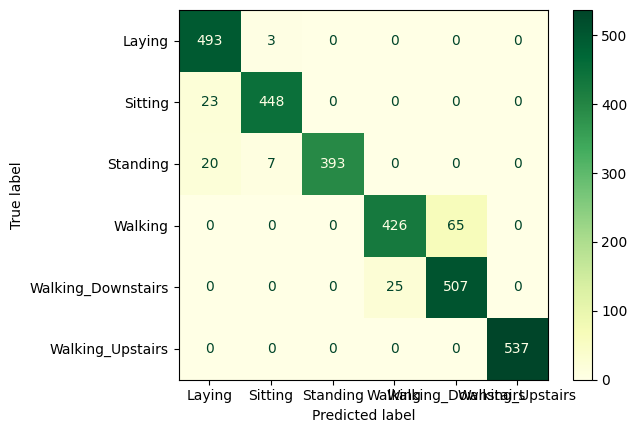

**Normalized Confusion Matrix:**


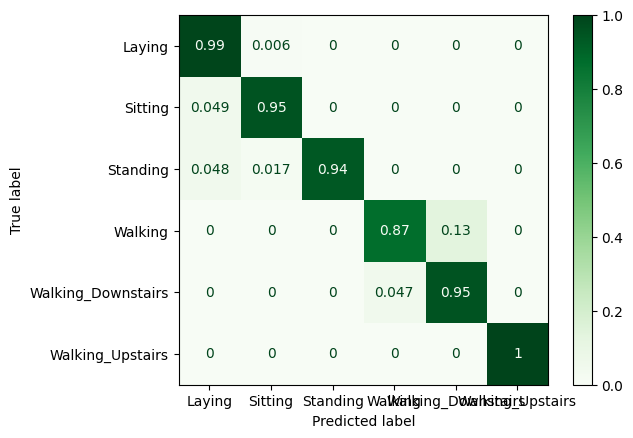

**Classification Report**
                    precision    recall  f1-score   support

            Laying       0.92      0.99      0.96       496
           Sitting       0.98      0.95      0.96       471
          Standing       1.00      0.94      0.97       420
           Walking       0.94      0.87      0.90       491
Walking_Downstairs       0.89      0.95      0.92       532
  Walking_Upstairs       1.00      1.00      1.00       537

          accuracy                           0.95      2947
         macro avg       0.95      0.95      0.95      2947
      weighted avg       0.95      0.95      0.95      2947



<span style='color:blue'>**Best Estimator:**</span>

DecisionTreeClassifier(max_depth=5)



<span style='color:blue'>**Best parameters:**</span>

{'max_depth': 5}



<span style='color:blue'>**Number of CrossValidation sets:**</span>

5



<span style='color:blue'>**Best Score:**</span>

0.9829986542543597



In [28]:
# Let's define the parameters to be tuned

parameters = {'max_depth':np.arange(4,10,1)}

# Let's initiate the model

dtree = DecisionTreeClassifier()
dtree_grid = GridSearchCV(dtree, param_grid=parameters, verbose=1, n_jobs=-1)
dtree_grid_results = perform_model(dtree_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# Printing the best attributes of the model

print_grid_search_attributes(dtree_grid_results['model'])

### 5. Random Forest Classifier

In [29]:
# Importing libraries

from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Training time (HH:MM:SS.ms) - 0:04:04.911007
Testing time (HH:MM:SS.ms) - 0:00:00.037025
**Accuracy:** 0.9623345775364778
**Confusion Matrix:**


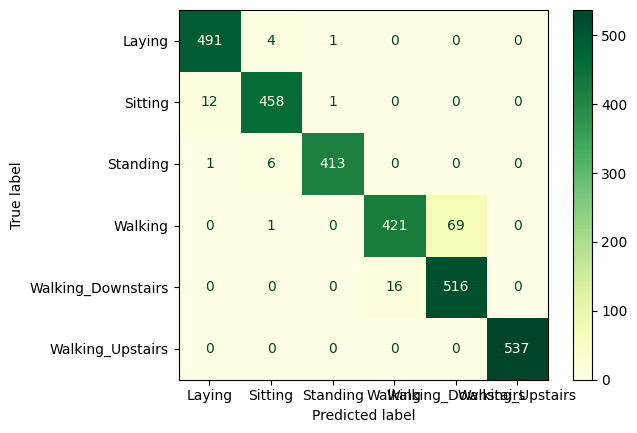

**Normalized Confusion Matrix:**


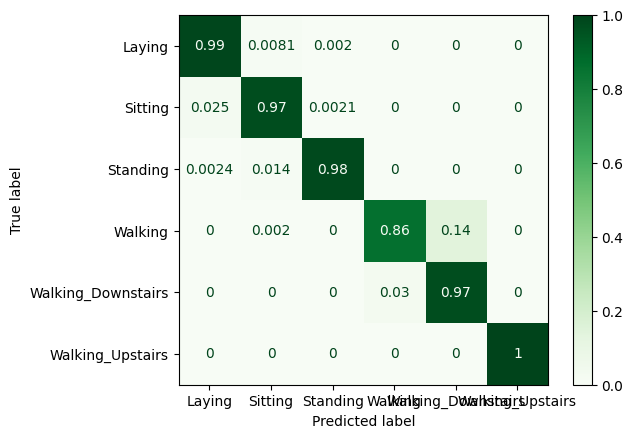

**Classification Report**
                    precision    recall  f1-score   support

            Laying       0.97      0.99      0.98       496
           Sitting       0.98      0.97      0.97       471
          Standing       1.00      0.98      0.99       420
           Walking       0.96      0.86      0.91       491
Walking_Downstairs       0.88      0.97      0.92       532
  Walking_Upstairs       1.00      1.00      1.00       537

          accuracy                           0.96      2947
         macro avg       0.97      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



<span style='color:blue'>**Best Estimator:**</span>

RandomForestClassifier(max_depth=6, n_estimators=190)



<span style='color:blue'>**Best parameters:**</span>

{'max_depth': 6, 'n_estimators': 190}



<span style='color:blue'>**Number of CrossValidation sets:**</span>

5



<span style='color:blue'>**Best Score:**</span>

0.9857186327964225



In [30]:
# Let's define the parameters to be tuned

parameters = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(4,15,2)}

# Let's initiate the model

rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=parameters, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# Printing the best attributes of the model

print_grid_search_attributes(rfc_grid_results['model'])

CNN

(7352, 564)
(2947, 564)
   tBodyAccmeanX  tBodyAccmeanY  tBodyAccmeanZ  tBodyAccstdX  tBodyAccstdY  \
0       0.288585      -0.020294      -0.132905     -0.995279     -0.983111   
1       0.278419      -0.016411      -0.123520     -0.998245     -0.975300   
2       0.279653      -0.019467      -0.113462     -0.995380     -0.967187   
3       0.279174      -0.026201      -0.123283     -0.996091     -0.983403   
4       0.276629      -0.016570      -0.115362     -0.998139     -0.980817   

   tBodyAccstdZ  tBodyAccmadX  tBodyAccmadY  tBodyAccmadZ  tBodyAccmaxX  ...  \
0     -0.913526     -0.995112     -0.983185     -0.923527     -0.934724  ...   
1     -0.960322     -0.998807     -0.974914     -0.957686     -0.943068  ...   
2     -0.978944     -0.996520     -0.963668     -0.977469     -0.938692  ...   
3     -0.990675     -0.997099     -0.982750     -0.989302     -0.938692  ...   
4     -0.990482     -0.998321     -0.979672     -0.990441     -0.942469  ...   

   angletBodyAccMeangravit

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 15s 57ms/step - accuracy: 0.5299 - loss: 1.0670 - val_accuracy: 0.8785 - val_loss: 0.2849
Epoch 2/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.8751 - loss: 0.3155 - val_accuracy: 0.9145 - val_loss: 0.1893
Epoch 3/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 19s 52ms/step - accuracy: 0.9129 - loss: 0.2241 - val_accuracy: 0.9369 - val_loss: 0.1590
Epoch 4/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 22s 58ms/step - accuracy: 0.9254 - loss: 0.1818 - val_accuracy: 0.9413 - val_loss: 0.1592
Epoch 5/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - accuracy: 0.9461 - loss: 0.1535 - val_accuracy: 0.9437 - val_loss: 0.1461
Epoch 6/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - accuracy: 0.9525 - loss: 0.1250 - val_accuracy: 0.9365 - val_loss: 0.1546
Epoch 7/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - accuracy: 0.9568 - loss: 0.1206 - val_accuracy: 0.9474 - val_loss: 0.1422
Epoch 8/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - accuracy: 0.9609 - loss: 0.1041 - 

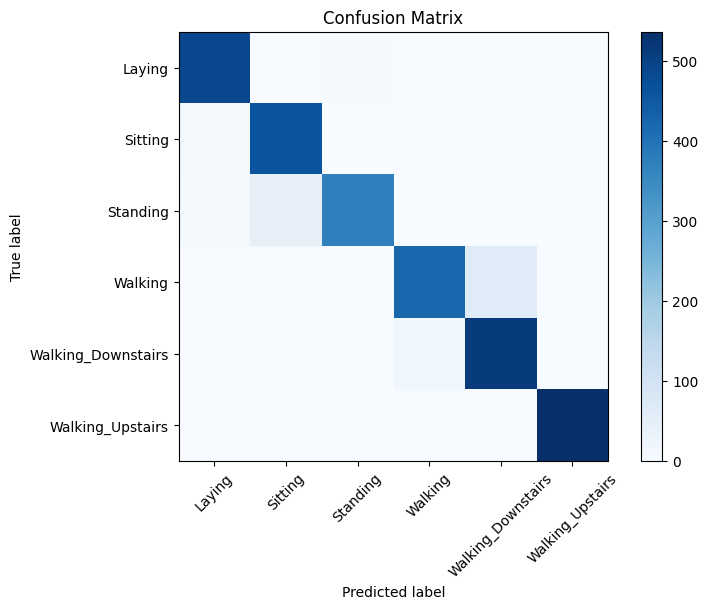

In [32]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Load data
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

# Check shape of train and test datasets
print(train.shape)
print(test.shape)

# Display first 5 rows of training data
print(train.head())

# Display first 5 rows of testing data
print(test.head())

# Get X_train and y_train from train data
X_train = train.drop(['Subject', 'Activity', 'Activity_Name'], axis=1)
y_train = train['Activity']

# Get X_test and y_test from test data
X_test = test.drop(['Subject', 'Activity', 'Activity_Name'], axis=1)
y_test = test['Activity']

# Display unique values in y_train to determine the correct number of classes
print("Unique values in y_train:", np.unique(y_train))

# Define number of classes based on the unique values in y_train
num_classes = len(np.unique(y_train))
print(f"Number of classes: {num_classes}")

# Encode labels and convert to categorical format
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
y_train_cnn = to_categorical(y_train, num_classes=num_classes)
y_test_cnn = to_categorical(y_test, num_classes=num_classes)

# Reshape X_train and X_test for CNN input (samples, timesteps, features)
X_train_cnn = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define CNN model function
def create_cnn_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.25))
    model.add(Conv1D(64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Initialize CNN model
input_shape = (X_train.shape[1], 1)
cnn_model = create_cnn_model(input_shape=input_shape, num_classes=num_classes)

# Define function to train and evaluate the CNN model
def perform_cnn_model(model, X_train, y_train, X_test, y_test, class_labels, epochs=10, batch_size=32):
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

    # Predict and evaluate
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Print classification report
    print("\nClassification Report:\n", classification_report(y_true, y_pred_classes, target_names=class_labels))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_labels))
    plt.xticks(tick_marks, class_labels, rotation=45)
    plt.yticks(tick_marks, class_labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    return history

# Define class labels
labels = ['Laying', 'Sitting', 'Standing', 'Walking', 'Walking_Downstairs', 'Walking_Upstairs']

# Train and evaluate CNN model
cnn_results = perform_cnn_model(cnn_model, X_train_cnn, y_train_cnn, X_test_cnn, y_test_cnn, class_labels=labels, epochs=10, batch_size=32)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


230/230 ━━━━━━━━━━━━━━━━━━━━ 16s 60ms/step - accuracy: 0.5646 - loss: 0.9831 - val_accuracy: 0.8432 - val_loss: 0.3618
Epoch 2/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - accuracy: 0.8746 - loss: 0.3340 - val_accuracy: 0.9284 - val_loss: 0.1859
Epoch 3/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 17s 55ms/step - accuracy: 0.9204 - loss: 0.2107 - val_accuracy: 0.9365 - val_loss: 0.1727
Epoch 4/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - accuracy: 0.9349 - loss: 0.1698 - val_accuracy: 0.9332 - val_loss: 0.1626
Epoch 5/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 24s 72ms/step - accuracy: 0.9466 - loss: 0.1447 - val_accuracy: 0.9437 - val_loss: 0.1614
Epoch 6/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9503 - loss: 0.1333 - val_accuracy: 0.9437 - val_loss: 0.1597
Epoch 7/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.9569 - loss: 0.1125 - val_accuracy: 0.9484 - val_loss: 0.1334
Epoch 8/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - accuracy: 0.9628 - loss: 0.0985 - val_accurac

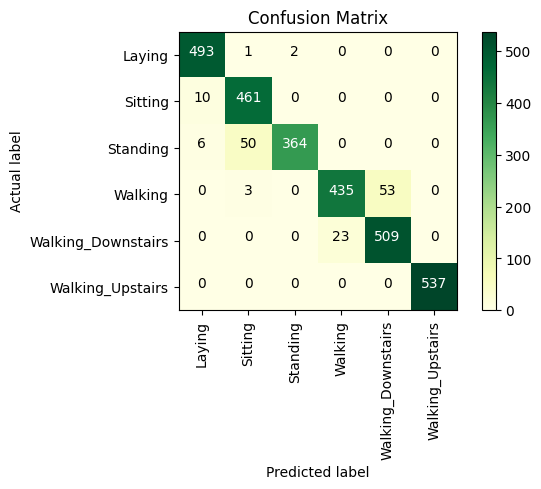

**Normalized Confusion Matrix:**


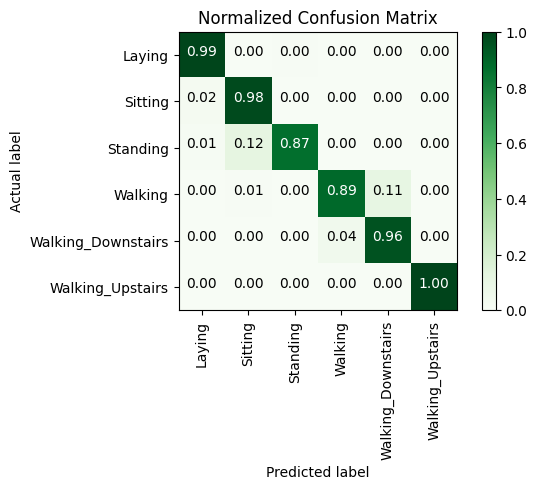

**Classification Report**
                    precision    recall  f1-score   support

            Laying       0.97      0.99      0.98       496
           Sitting       0.90      0.98      0.94       471
          Standing       0.99      0.87      0.93       420
           Walking       0.95      0.89      0.92       491
Walking_Downstairs       0.91      0.96      0.93       532
  Walking_Upstairs       1.00      1.00      1.00       537

          accuracy                           0.95      2947
         macro avg       0.95      0.95      0.95      2947
      weighted avg       0.95      0.95      0.95      2947



In [33]:
# Import necessary libraries
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from IPython.display import Markdown, display
from sklearn.model_selection import GridSearchCV
from datetime import datetime
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Function to print text in Bold and in given color
def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))

# Function to plot Confusion Matrix
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap = plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

# Define CNN model function
def create_cnn_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.25))
    model.add(Conv1D(64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Define the function to train and evaluate the CNN model using the custom functions
def perform_cnn_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, print_cm=True, cm_cmap=plt.cm.Greens, epochs=10, batch_size=32):
    results = dict()

    # Training time
    train_start_time = datetime.now()
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))
    train_end_time = datetime.now()
    results['training_time'] = train_end_time - train_start_time
    print(f'Training time (HH:MM:SS.ms) - {results["training_time"]}')

    # Testing time
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    results['testing_time'] = test_end_time - test_start_time
    print(f'Testing time (HH:MM:SS.ms) - {results["testing_time"]}')

    # Convert predictions to class labels
    y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
    y_test_classes = np.argmax(y_test, axis=1)  # Convert one-hot encoded y_test to class labels

    results['predicted'] = y_pred_classes

    # Model accuracy
    accuracy = metrics.accuracy_score(y_test_classes, y_pred_classes)
    results['accuracy'] = accuracy
    print(f'**Accuracy:** {accuracy}')

    # Confusion Matrix
    cm = confusion_matrix(y_test_classes, y_pred_classes)
    print('**Confusion Matrix:**')
    plot_confusion_matrix(cm, classes=class_labels, normalize=False, title='Confusion Matrix', cmap=plt.cm.YlGn)
    plt.show()

    # Normalized Confusion Matrix
    if cm_normalize:
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('**Normalized Confusion Matrix:**')
        plot_confusion_matrix(cm_normalized, classes=class_labels, normalize=True, title='Normalized Confusion Matrix', cmap=cm_cmap)
        plt.show()

    # Classification report
    classification_report_str = classification_report(y_test_classes, y_pred_classes, target_names=class_labels)
    results['classification_report'] = classification_report_str
    print('**Classification Report**')
    print(classification_report_str)

    # Store model in results
    results['model'] = model

    return results


# Example usage:

# Assume train, test, and class_labels are already defined
# Encode labels and convert to categorical format
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
y_train_cnn = to_categorical(y_train, num_classes=num_classes)
y_test_cnn = to_categorical(y_test, num_classes=num_classes)

# Reshape X_train and X_test for CNN input (samples, timesteps, features)
X_train_cnn = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define class labels
labels = ['Laying', 'Sitting', 'Standing', 'Walking', 'Walking_Downstairs', 'Walking_Upstairs']

# Define CNN model
input_shape = (X_train.shape[1], 1)
cnn_model = create_cnn_model(input_shape=input_shape, num_classes=len(labels))

# Train and evaluate the model using the custom functions
cnn_results = perform_cnn_model(cnn_model, X_train_cnn, y_train_cnn, X_test_cnn, y_test_cnn, class_labels=labels, epochs=10, batch_size=32)


### Let's compare all the models together

In [34]:
# Assuming cnn_results['accuracy'] contains the CNN model accuracy
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%      {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('Linear SVC          : {:.04}%       {:.04}% '.format(lin_svc_grid_results['accuracy'] * 100,\
                                                        100-(lin_svc_grid_results['accuracy'] * 100)))

print('RBF SVM classifier  : {:.04}%      {:.04}% '.format(rbf_svc_grid_results['accuracy'] * 100,\
                                                          100-(rbf_svc_grid_results['accuracy'] * 100)))

print('Decision Tree       : {:.04}%      {:.04}% '.format(dtree_grid_results['accuracy'] * 100,\
                                                        100-(dtree_grid_results['accuracy'] * 100)))

print('Random Forest       : {:.04}%       {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))

# Assuming cnn_results['accuracy'] contains CNN model accuracy
print('CNN Model           : {:.04}%      {:.04}% '.format(cnn_results['accuracy'] * 100,\
                                                         100 - (cnn_results['accuracy'] * 100)))



                     Accuracy     Error
                     ----------   --------
Logistic Regression : 96.34%      3.665%
Linear SVC          : 96.2%       3.8% 
RBF SVM classifier  : 96.84%      3.156% 
Decision Tree       : 95.15%      4.852% 
Random Forest       : 96.23%       3.767% 
CNN Model           : 94.98%      5.022% 


STACKING ENSEMBLE

In [25]:
!pip install tensorflow
!pip install scikeras # Install the necessary package

CNN,SVC,Lg(MERGED-STACKING)

Stacking Ensemble Accuracy: 96.03%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       496
           1       0.94      0.97      0.96       471
           2       0.98      0.94      0.96       420
           3       0.96      0.89      0.93       491
           4       0.91      0.97      0.94       532
           5       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



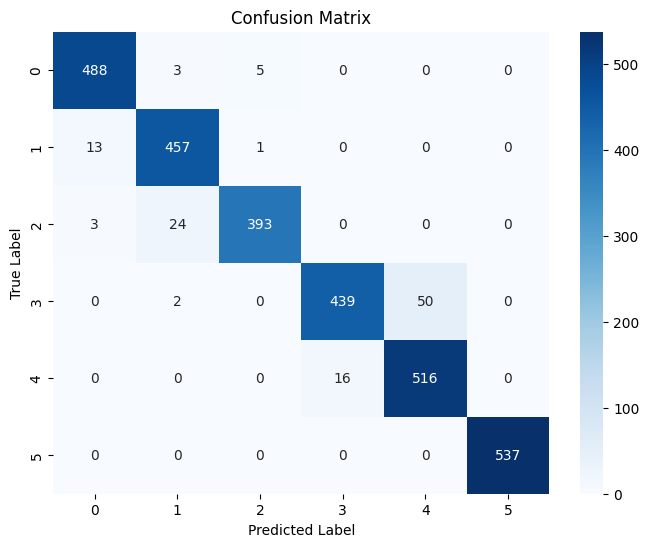

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import models, layers, regularizers
from keras.layers import Input
from scikeras.wrappers import KerasClassifier
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define CNN model creation function with fewer epochs for faster execution
# Added **kwargs to accept input_shape
def create_cnn_model(num_classes, **kwargs):
    model = models.Sequential()
    # Access input_shape from kwargs
    # Changed input_shape to 561 to match X_train
    input_shape = 561
    model.add(Input(shape=(input_shape,)))
    model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(layers.Dropout(0.2))  # Add Dropout to reduce overfitting
    model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(layers.Dropout(0.2))  # Add Dropout to reduce overfitting
    model.add(layers.Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Use TensorFlow function to reduce retracing during inference
@tf.function(reduce_retracing=True)
def predict_with_model(model, input_tensor):
    return model(input_tensor)

# Assuming you have input data X_train, y_train (already preprocessed)
input_shape = 4  # Number of features in the dataset (adjust this based on your input)
num_classes = len(set(y_train))  # Automatically determine number of classes

# Create a pipeline for CNN with feature scaling and fewer epochs
# Pass input_shape as a keyword argument
cnn_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale features for better CNN performance
    ('cnn', KerasClassifier(model=create_cnn_model,  num_classes=num_classes, epochs=5, batch_size=32, verbose=0, input_shape=input_shape))  # Reduced epochs to 5, added input_shape
])

# Initialize other base models with scaling applied
log_reg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(C=0.25, max_iter=1000))  # Increased max_iter to 1000
])

svc_linear_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc_linear', SVC(kernel='linear', C=0.5, probability=True))
])

# Define the Stacking Ensemble with fewer base models
stacking_clf = StackingClassifier(
    estimators=[
        ('log_reg', log_reg_pipeline),
        ('svc_linear', svc_linear_pipeline),
        ('cnn', cnn_pipeline)  # Use the CNN pipeline
    ],
    final_estimator=LogisticRegression() # Meta-model (usually logistic regression)
)

# Train the stacking ensemble model
stacking_clf.fit(X_train, y_train)

# Evaluate the model
stacking_accuracy = stacking_clf.score(X_test, y_test)
print(f"Stacking Ensemble Accuracy: {stacking_accuracy * 100:.2f}%")

# Generate the classification report
y_pred = stacking_clf.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


RF,CNN,SVC

Stacking Ensemble Accuracy (CNN + RF + SVM): 94.50%

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       496
           1       0.92      0.91      0.92       471
           2       0.99      0.88      0.93       420
           3       0.95      0.92      0.93       491
           4       0.93      0.95      0.94       532
           5       1.00      1.00      1.00       537

    accuracy                           0.95      2947
   macro avg       0.95      0.94      0.94      2947
weighted avg       0.95      0.95      0.94      2947



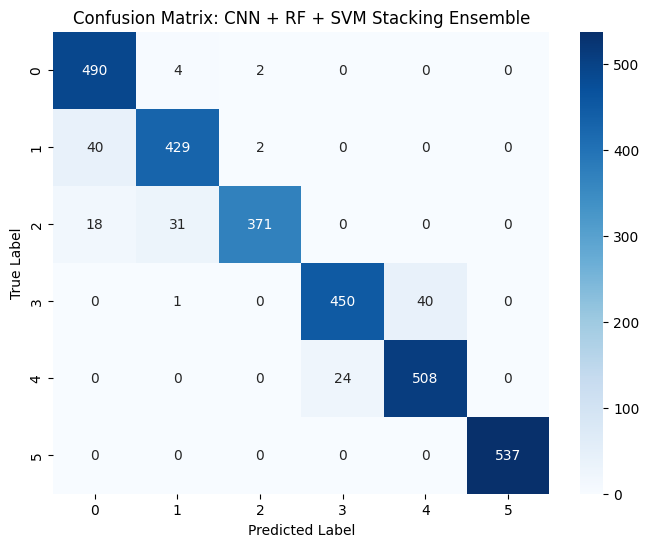

In [ ]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import models, layers, regularizers
from keras.layers import Input
from scikeras.wrappers import KerasClassifier
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define CNN model creation function
def create_cnn_model(num_classes, **kwargs):
    model = models.Sequential()
    input_shape = 561  # Number of features in your dataset
    model.add(Input(shape=(input_shape,)))
    model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(layers.Dropout(0.2))  # Dropout to reduce overfitting
    model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(layers.Dropout(0.2))  # Dropout to reduce overfitting
    model.add(layers.Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Assuming you have input data X_train, y_train (already preprocessed)
input_shape = 4  # Adjust this based on your input features
num_classes = len(set(y_train))  # Automatically determine the number of classes

# Create a pipeline for CNN with feature scaling
cnn_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale features for better CNN performance
    ('cnn', KerasClassifier(model=create_cnn_model, num_classes=num_classes, epochs=5, batch_size=32, verbose=0, input_shape=input_shape))  # Reduced epochs to 5
])

# Create Random Forest pipeline with scaling
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42))  # Random Forest with 100 trees and max_depth=10
])

# Create SVM pipeline with scaling
svc_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='rbf', C=1.0, probability=True))  # SVM with RBF kernel and probability estimates enabled
])

# Define the Stacking Ensemble
stacking_clf = StackingClassifier(
    estimators=[
        ('cnn', cnn_pipeline),   # Use CNN pipeline
        ('rf', rf_pipeline),     # Use Random Forest pipeline
        ('svc', svc_pipeline)    # Use SVM pipeline
    ],
    final_estimator=LogisticRegression(max_iter=1000)  # Meta-model (Logistic Regression)
)

# Train the stacking ensemble model
stacking_clf.fit(X_train, y_train)

# Evaluate the model
stacking_accuracy = stacking_clf.score(X_test, y_test)
print(f"Stacking Ensemble Accuracy (CNN + RF + SVM): {stacking_accuracy * 100:.2f}%")

# Generate the classification report
y_pred = stacking_clf.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: CNN + RF + SVM Stacking Ensemble')
plt.show()


logistic reg,svm,svc


Stacking Ensemble Accuracy: 96.27%

Classification Report:
              precision    recall  f1-score   support

           1       0.97      0.99      0.98       496
           2       0.97      0.97      0.97       471
           3       1.00      0.98      0.99       420
           4       0.96      0.87      0.91       491
           5       0.89      0.96      0.93       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



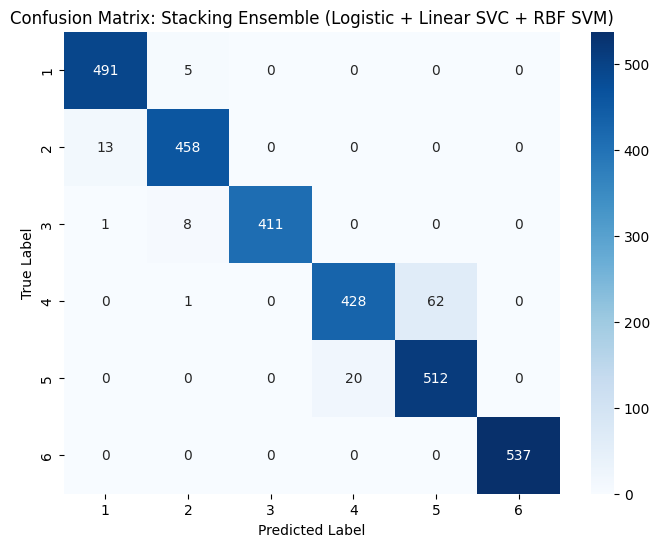

In [26]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming you already have X_train, X_test, y_train, y_test preprocessed

# Define pipelines for base models
log_reg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(C=0.25, max_iter=1000))  # Logistic Regression
])

svc_linear_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc_linear', SVC(kernel='linear', C=0.5, probability=True))  # Linear SVC
])

rbf_svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc_rbf', SVC(kernel='rbf', C=1.0, probability=True))  # RBF SVM
])

# Define the Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=[
        ('log_reg', log_reg_pipeline),       # Logistic Regression
        ('svc_linear', svc_linear_pipeline), # Linear SVC
        ('svc_rbf', rbf_svm_pipeline)        # RBF SVM
    ],
    final_estimator=LogisticRegression(max_iter=500)  # Meta-model
)

# Train the stacking ensemble model
stacking_clf.fit(X_train, y_train)

# Evaluate the model
stacking_accuracy = stacking_clf.score(X_test, y_test)
print(f"Stacking Ensemble Accuracy: {stacking_accuracy * 100:.2f}%")

# Generate the classification report
y_pred = stacking_clf.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: Stacking Ensemble (Logistic + Linear SVC + RBF SVM)')
plt.show()


log reg,svc,svm,rf

Stacking Ensemble Accuracy (LogReg + Linear SVC + RBF SVM + RF): 96.37%

Classification Report:
              precision    recall  f1-score   support

           1       0.97      0.99      0.98       496
           2       0.97      0.97      0.97       471
           3       1.00      0.98      0.99       420
           4       0.96      0.88      0.91       491
           5       0.90      0.96      0.93       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.97      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



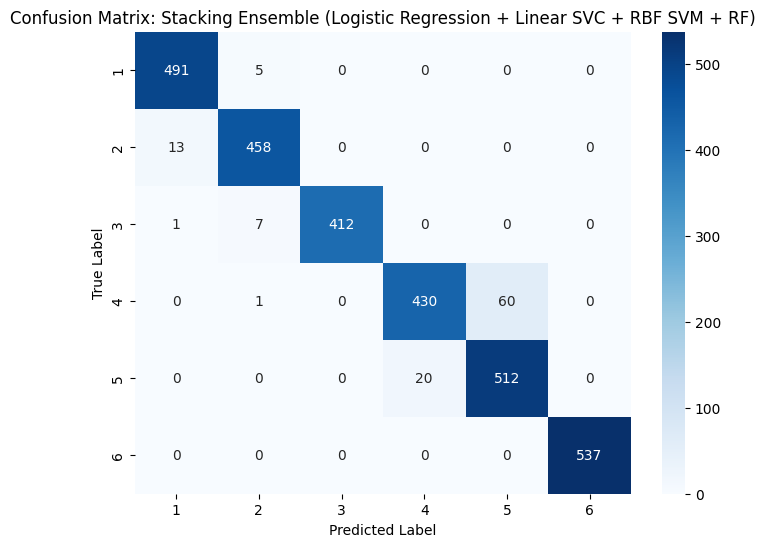

In [31]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have X_train, X_test, y_train, y_test preprocessed

# Define pipelines for base models
log_reg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(C=0.25, max_iter=1000))  # Logistic Regression
])

svc_linear_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc_linear', SVC(kernel='linear', C=0.5, probability=True))  # Linear SVC
])

rbf_svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc_rbf', SVC(kernel='rbf', C=1.0, probability=True))  # RBF SVM
])

rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling for Random Forest is optional but added for uniformity
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42))  # Random Forest
])

# Define the Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=[
        ('log_reg', log_reg_pipeline),       # Logistic Regression
        ('svc_linear', svc_linear_pipeline), # Linear SVC
        ('svc_rbf', rbf_svm_pipeline),       # RBF SVM
        ('rf', rf_pipeline)                  # Random Forest
    ],
    final_estimator=LogisticRegression(max_iter=500)  # Meta-model (Logistic Regression)
)

# Train the stacking ensemble model
stacking_clf.fit(X_train, y_train)

# Evaluate the model
stacking_accuracy = stacking_clf.score(X_test, y_test)
print(f"Stacking Ensemble Accuracy (LogReg + Linear SVC + RBF SVM + RF): {stacking_accuracy * 100:.2f}%")

# Generate the classification report
y_pred = stacking_clf.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: Stacking Ensemble (Logistic Regression + Linear SVC + RBF SVM + RF)')
plt.show()


logistic regresion,svc,svm, rf,cnn

Stacking Ensemble Accuracy (LogReg + SVC + RBF SVM + RF + CNN): 95.49%

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       496
           1       0.94      0.94      0.94       471
           2       0.98      0.92      0.95       420
           3       0.97      0.89      0.93       491
           4       0.91      0.97      0.94       532
           5       1.00      1.00      1.00       537

    accuracy                           0.95      2947
   macro avg       0.96      0.95      0.95      2947
weighted avg       0.96      0.95      0.95      2947



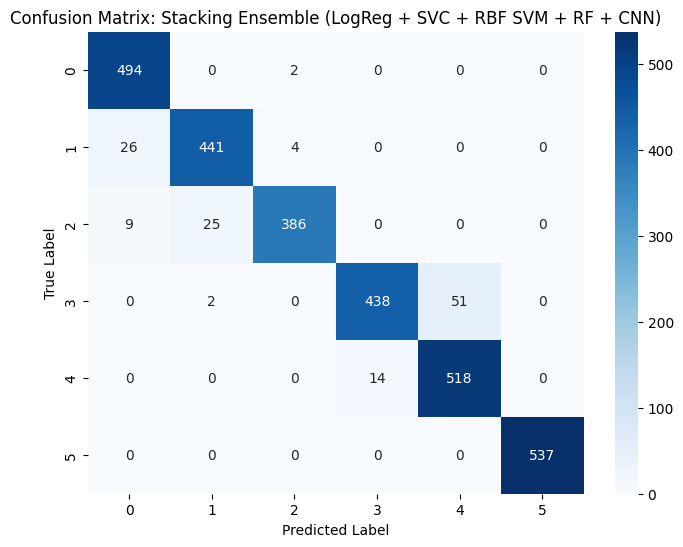

In [35]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import models, layers, regularizers
from keras.layers import Input
from scikeras.wrappers import KerasClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Define CNN model creation function
def create_cnn_model(num_classes, **kwargs):
    model = models.Sequential()
    input_shape = 561  # Update based on your dataset's feature count
    model.add(Input(shape=(input_shape,)))
    model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(layers.Dropout(0.2))  # Add Dropout to reduce overfitting
    model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(layers.Dropout(0.2))  # Add Dropout to reduce overfitting
    model.add(layers.Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Assuming X_train, X_test, y_train, y_test are preprocessed and available
input_shape = 561  # Adjust to match the number of features in your dataset
num_classes = len(set(y_train))  # Automatically determine the number of classes

# Define CNN pipeline
cnn_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling for CNN
    ('cnn', KerasClassifier(model=create_cnn_model, num_classes=num_classes, epochs=5, batch_size=32, verbose=0, input_shape=input_shape))  # CNN with fewer epochs
])

# Define pipelines for other base models
log_reg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(C=0.25, max_iter=1000))  # Logistic Regression
])

svc_linear_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc_linear', SVC(kernel='linear', C=0.5, probability=True))  # Linear SVC
])

rbf_svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc_rbf', SVC(kernel='rbf', C=1.0, probability=True))  # RBF SVM
])

rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Optional scaling for Random Forest
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42))  # Random Forest
])

# Define the Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=[
        ('log_reg', log_reg_pipeline),       # Logistic Regression
        ('svc_linear', svc_linear_pipeline), # Linear SVC
        ('svc_rbf', rbf_svm_pipeline),       # RBF SVM
        ('rf', rf_pipeline),                 # Random Forest
        ('cnn', cnn_pipeline)                # CNN
    ],
    final_estimator=LogisticRegression(max_iter=500)  # Meta-model (Logistic Regression)
)

# Train the Stacking Classifier
stacking_clf.fit(X_train, y_train)

# Evaluate the model
stacking_accuracy = stacking_clf.score(X_test, y_test)
print(f"Stacking Ensemble Accuracy (LogReg + SVC + RBF SVM + RF + CNN): {stacking_accuracy * 100:.2f}%")

# Generate the classification report
y_pred = stacking_clf.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: Stacking Ensemble (LogReg + SVC + RBF SVM + RF + CNN)')
plt.show()
